# Electron Data Analysis

In [909]:
# Importing modules needed for data analysis.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.constants as c
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit


In [910]:
def url(path):
    path = 'https://gitlab.com/xmoskala/labdata/-/raw/main/millikanlab'+path
    path = path.replace(" ", "%20")
    return path

k = scipy.constants.physical_constants["Boltzmann constant in eV/K"][0]


transistordata = pd.read_csv(url("/transistordata.csv"), header=0).to_numpy().T
td1 = transistordata[:2][:,:25]
td2 = transistordata[2:4][:,:22]
td3 = transistordata[4:6][:,:38]
td4 = transistordata[6:8][:,:23]
oktd = np.loadtxt(url("/Millikan1.txt"))
ktd = np.array([oktd[0][oktd[1] < 7],oktd[1][oktd[1] < 7]])


In [911]:
arrx = np.concatenate((td1[1][3:-3], td2[1], td3[1][2:-6], td4[1][:-1], ktd[0]))
arry = np.concatenate((td1[0][3:-3], td2[0], td3[0][2:-6], td4[0][:-1], ktd[1]))
def semilog(x, m, b):
    return m*x + b
p, C = curve_fit(semilog, arrx, np.log(arry), absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
m = p[0]
b = p[1]
err = sigp[0]

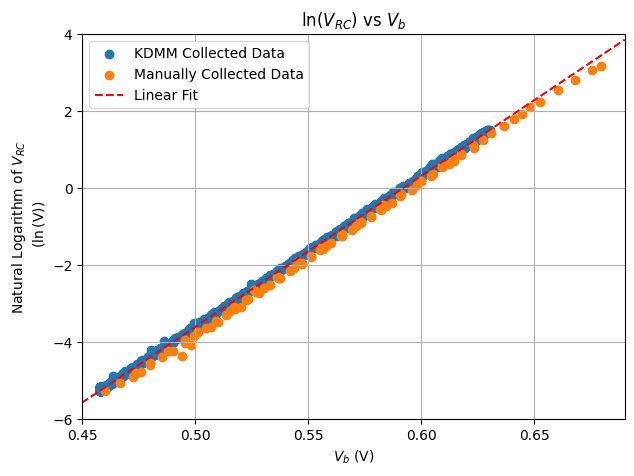

In [912]:
x = np.arange(0.4,0.7,0.01)

xerr=0
yerr=0.5
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
plt.scatter(arrx[93:],np.log(arry)[93:], label= "KDMM Collected Data")
plt.scatter(arrx[:93],np.log(arry)[:93], label= "Manually Collected Data")
#ax.errorbar(arrx[:93], np.log(arry)[:93],
#            xerr=xerr,
#            yerr=yerr,
#            fmt='o',
#            capsize=2,
#            alpha=1)
#ax.errorbar(arrx[93:], np.log(arry)[93:],
#            xerr=xerr,
#            yerr=yerr,
#            fmt='o',
#            capsize=2,
#            alpha=0.5)
plt.plot(x, semilog(x,m,b), color='red', ls='--', label="Linear Fit")
ax.set_ylabel('Natural Logarithm of $V_{RC}$\n ($\ln$(V))')
ax.set_xlabel('$V_b$ (V)')
ax.set_title('$\ln (V_{RC})$ vs $V_b$')

# set the limits
ax.set_ylim(-6, 4)
ax.set_xlim(0.45, 0.69)

ax.legend()
ax.grid('on')
plt.show()


In [913]:
T = 300
print(m*k*T)
print(err*k*T)
tevalue=m*k*T*e
teuncer=(err*k*T)

1.0152325902817112
0.011590336688136584


In [914]:
xdata = [15,20]
ydata = [1.8,1.824]
def lin(x, m, b):
    return m*x + b
ps, C = curve_fit(lin, xdata, ydata, absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
m = ps[0]
bs = ps[1]
err = sigp[0]

In [915]:
#oil drop

#accepted
e = 1.60e-19 #C

d = 0.00758 #m
rho = 886 #kg/m^3
#rho = np.arange(870,890,0.1)
g = c.g #m/s^2
T = 22 #degC
n = lin(T,m,bs)*10**-5 #Ns/m^2
b = 8.20e-3 #Pa*m
#p = c.bar #Pa
p = 101325 #Pa
V = 500 #V

def charge(vf, vr, V):
    E = V/(d)
    X = b/(2*p)
    Y = (9*n*vf/(2*g*rho))
    C = (4/3)*np.pi*rho*g
    P = np.sqrt(X**2+Y) - X
    F = (vf+vr)/(E*vf)
    return C*(P**3)*F
dah=3.9122222222222214e-05
a = np.sqrt((b/(2*p))**2+(9*n*dah)/(2*g*rho))-b/(2*p)
print((1/(1+b/(p*a)))**(3/2))

0.8195409451677381


In [916]:
#A-D (ionized)
print((charge(4.23e-5,5.84e-4, 500)))
print(charge(3.16e-5,5.30e-4, 500))
print((charge(4.33e-5,3.98e-4, 500)))
print(charge(4.34e-5,3.92e-4, 500))

(1.5*10**(-3))/5.84e-4

1.7175715243467517e-18
1.2918316812373216e-18
1.2271687720593924e-18
1.2124233524614115e-18


2.568493150684932

In [917]:
print(charge(3.09e-5,1.03e-4, 500))
#A-D
print((charge(4.23e-5,9.16e-6, 500)))
print(charge(3.16e-5,3.11e-4, 500))
print((charge(4.33e-5,1.8e-4, 500)))
print(charge(4.34e-5,1.7e-4, 500))

(1.5*10**(-3))/3.11e-4

3.0381842815507656e-19
1.4112443021376952e-19
7.880725320368706e-19
6.209535164306874e-19
5.942378121618403e-19


4.823151125401929

In [918]:
V = 380 #V
#E-F
print((charge(3.95e-5,3.24e-6, 380)))
print(charge(3.69e-5,7.53e-6, 380))
print(charge(3.95e-5,4.67e-5, 380))

(1.5*10**(-3))/4.67e-5

1.4804376047965223e-19
1.477312261742253e-19
2.9858147293743613e-19


32.11991434689508

In [919]:
V1 = 500
vff = np.array([4.23e-5,3.16e-5, 4.33e-5, 4.34e-5, 3.09e-5, 4.23e-5, 3.16e-5, 4.33e-5, 4.34e-5])
vrf = np.array([5.84e-4, 5.30e-4, 3.98e-4, 3.92e-4, 1.03e-4, 9.16e-6, 3.11e-4, 1.8e-4, 1.7e-4])
vffn = vff[4:]
vffi = vff[:4]
vrfn = vrf[4:]
vrfi = vrf[:4]
print(np.average(vff))
V2 = 380
vfg = np.array([3.95e-5, 3.69e-5, 3.95e-5])
vrg = np.array([3.24e-6, 7.53e-6, 4.67e-5])

#x = np.arange(0,20*e,e)
#spl = InterpolatedUnivariateSpline(x, charge(vfg,vrg,V2)/e)
#fig = plt.figure(figsize=[7,5])
#ax = plt.subplot(111)
#plt.scatter(x, charge(vfg,vrg,V2)/e)
#ax.set_ylabel('Charge')
#ax.set_xlabel('Electron Charge')
#ax.set_title('Placeholder')

# set the limits
#ax.set_ylim(90, 290)
#ax.set_xlim(200, 2000)

#ax.grid('on')
#plt.show()

3.9122222222222214e-05


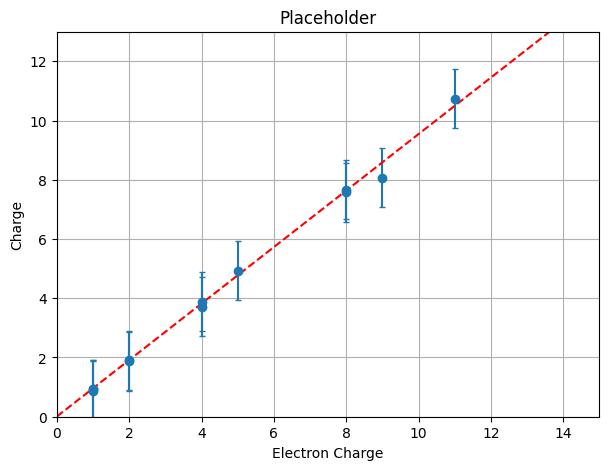

In [920]:
chrg = np.concatenate([charge(vff,vrf,V1)/e,charge(vfg,vrg,V2)/e])
ne = np.round(np.concatenate([charge(vff,vrf,V1)/e,charge(vfg,vrg,V2)/e])+0.5)

def lin(x, m, b):
    return m*x + b
ps, C = curve_fit(lin, ne, chrg, absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
m = ps[0]
bs = ps[1]
err = sigp[0]

x = np.arange(0,35,0.1)
xerr=0
yerr=1
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
#plt.scatter(ne,chrg)
ax.errorbar(ne, chrg,
            xerr=xerr,
            yerr=yerr,
            fmt='o',
            capsize=2)
plt.plot(x, lin(x,m,b), color='red', ls='--')
plt.plot(1, 1, marker="o", markersize=3, markeredgecolor="red",
markerfacecolor="green")
ax.set_ylabel('Charge')
ax.set_xlabel('Electron Charge')
ax.set_title('Placeholder')

# set the limits
ax.set_ylim(0, 13)
ax.set_xlim(0, 15)

ax.grid('on')
plt.show()


In [921]:
print(m)
print(err)
print(bs)

0.9536004442750375
0.08553983880071887
-0.027448683341203317


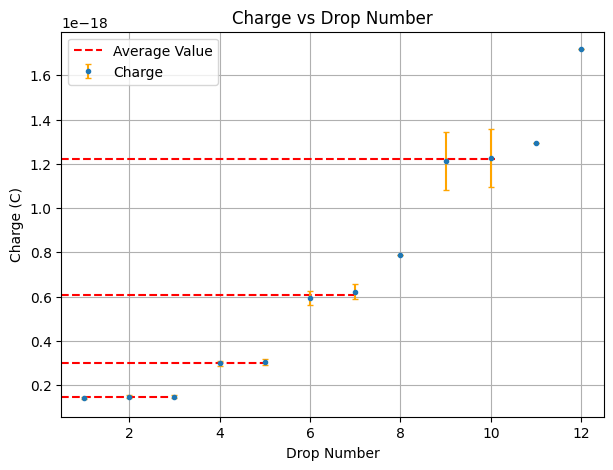

1.4563313895588236e-19
3.0119995054625634e-19
6.075956642962638e-19
1.2918316812373216e-18
1.7175715243467519e-18
[1.41124430e-19 1.47731226e-19 1.48043760e-19 2.98581473e-19
 3.03818428e-19 5.94237812e-19 6.20953516e-19 7.88072532e-19
 1.21242335e-18 1.22716877e-18 1.29183168e-18 1.71757152e-18]


In [922]:
chrg = np.sort(chrg)*1.6e-19
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
yerr=np.array([0.05,0.06,0.06,0.11,0.13,0.32,0.34,0,1.3,1.3,0,0])*10**(-19)
ne=np.array([1,2,3,4,5,6,7,8,9,10,11,12])
stp1= (chrg[0]+chrg[1]+chrg[2])/3
stp2= (chrg[3]+chrg[4])/2
stp3= (chrg[5]+chrg[6])/2
stp4= (chrg[8]+chrg[9])/2
ax.axhline(stp1,xmax=0.2, ls = "--", color='red', label="Average Value")
ax.axhline(stp2,xmax=0.38, ls = "--", color='red')
ax.axhline(stp3,xmax=0.54, ls = "--", color='red')
ax.axhline(stp4,xmax=0.8, ls = "--", color='red')
#plt.scatter(ne,chrg)
ax.errorbar(ne, chrg,
            yerr=yerr,
            fmt='.',
            capsize=2,
            ecolor='orange',
            label='Charge')
ax.set_ylabel('Charge (C)')
ax.set_xlabel('Drop Number')
ax.set_title('Charge vs Drop Number')

# set the limits
#ax.set_ylim(0, 13)
ax.set_xlim(0.5, 12.5)

ax.legend()
ax.grid('on')
plt.show()
print(stp1)
print(stp2)
print(stp3)
print(chrg[10])
print(chrg[11]) 
print(chrg)

In [923]:
print(stp1)
print((stp2-stp1))
print(stp3-3*(stp2-stp1))
print((stp3-stp2)-stp1)
print((stp4-stp3)-stp2-stp1)
print((stp1+stp2/2+stp3/4+stp4/6)/4)
evalue=(stp1 +(stp2-stp1)+(stp3-stp2)-stp1+((stp4-stp3)-stp2-stp1))/4
print(evalue)
print()
print(stp3/4)
print(stp4/8)
A=stp1 #1
B=stp2 #2
C=stp3 #4
print((A +(B-A)+(C-3*A)+(C-B-A))/4)
evalue = (A +(B-A)+(C-3*A)+(C-B-A))/4
      

1.4563313895588236e-19
1.5556681159037398e-19
1.4089522952514185e-19
1.6076257479412514e-19
1.653673084619994e-19
1.6285784350328586e-19
1.5683245845059523e-19

1.5189891607406596e-19
1.5247450778255024e-19
1.5816469319224956e-19


In [924]:
print(
"Millikan Electron Value:",evalue,
"\nAccepted Value:",e,
"\nAccuracy:",np.abs(e-evalue)/e,
"\nUncertainty:", "WIP"
)
print(
"Millikan Electron Value:",tevalue,
"\nAccepted Value:",e,
"\nAccuracy:",np.abs(e-tevalue)/e,
"\nUncertainty:", teuncer
)

Millikan Electron Value: 1.5816469319224956e-19 
Accepted Value: 1.6e-19 
Accuracy: 0.011470667548440169 
Uncertainty: WIP
Millikan Electron Value: 1.6243721444507379e-19 
Accepted Value: 1.6e-19 
Accuracy: 0.015232590281711226 
Uncertainty: 0.011590336688136584


In [927]:
A = (chrg[0]+chrg[1]+chrg[2])/3 #1e
B = (chrg[3]+chrg[4])/2 #2e
C = (chrg[5]+chrg[6])/2 #4e
D = (chrg[8]+chrg[9])/2 #8e NOT INCLUDED AS ERROR IS TOO HIGH
print((A +(B-A)+(C-3*A)+(C-B-A))/4)
print((A+B/2+C/4)/3)

1.5816469319224956e-19
1.4937734343435882e-19


In [903]:
Ar = (0.05+0.06+0.06)/3
Br = (0.09+0.12)/2
Cr = (0.32+0.34)/2
Dr = (1.3+1.3)/2
print((Ar +(Br-Ar)+(Cr-3*Ar)+(Cr-Br-Ar))/4)
print((Ar+Br/2)/3)

0.10833333333333334
0.03638888888888889
